# ODE Solver using SciPy
ref: https://www.youtube.com/watch?v=1fOqlbmWlPc

In [1]:
!python -m pip list

Package                  Version
------------------------ -----------
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   5.0.1
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       2.1.1
comm                     0.1.2
contourpy                1.0.6
cycler                   0.11.0
debugpy                  1.6.5
decorator                5.1.1
defusedxml               0.7.1
entrypoints              0.4
executing                1.2.0
fastjsonschema           2.16.2
fonttools                4.38.0
fqdn                     1.5.1
idna                     3.4
importlib-metadata       6.0.0
ipykernel                6.20.1
ipython                  8.8.0
ipython-genutils         0.2.0
isoduration          

In [2]:
import scipy as sp

In [3]:
dir(sp)

['LowLevelCallable',
 '__numpy_version__',
 '__version__',
 'cluster',
 'datasets',
 'fft',
 'fftpack',
 'integrate',
 'interpolate',
 'io',
 'linalg',
 'misc',
 'ndimage',
 'odr',
 'optimize',
 'show_config',
 'signal',
 'sparse',
 'spatial',
 'special',
 'stats',
 'test']

In [1]:
from scipy.integrate import odeint

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
 

## Radioactive decay

Governing equation is
$$ \frac{dC}{dt} = - \frac{C}{\tau}. \label{eq:decay} $$
The exact solution is
$$ C(t) = C_0 e^{-t / \tau}, \label{eq:solution} $$
where $C_0$ is the initial concentration.
    


Solve the above equation with $\tau = 1, C_0 = 1$ and $t_{end} = 5.$

In [5]:
%matplotlib inline
import numpy as np

In [6]:
def rhsf(C, t):
    t = 1.0
    return -C/t

t = np.linspace(0, 5, 1000)

c0 = 1.0

c = odeint(rhsf, c0, t)


In [7]:
import matplotlib.pyplot as plt

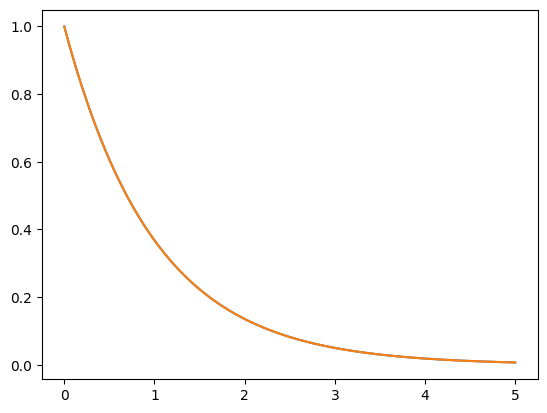

In [10]:
plt.plot(t, c, t, c0*np.exp(-t/1.0))

**Two solutions match exactly.**

## Terminal velocity
For vertical velocity v of a body moving in air under gravitation, equation of motion is:
$$ \frac{dv}{dt} = g - cv^2. \label{eq:eom} $$
- $g = 9.81, c = 1.$
- $v_0 = 0.$
- Solve to $t = 2.$

In [17]:
def term_rhsf(v, t, g, c):
    '''v: velocity, t: time, g: gravitational const, c: drag coeff'''
    return g - c * v * v

ts = np.linspace(0, 2, 1000)

v0 = 0
g = 9.81
c = 1

vsol = odeint(term_rhsf, v0, ts, (g, c))

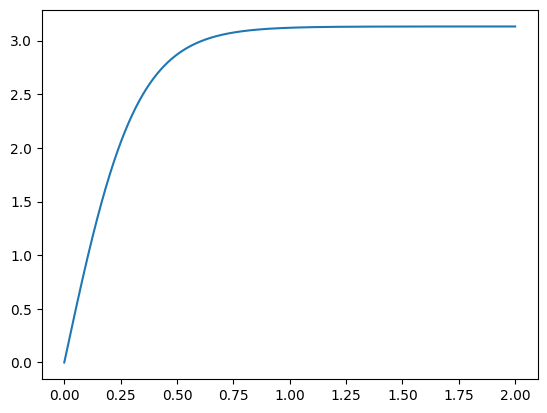

In [18]:
plt.plot(ts, vsol)

## Simultaneous equations
Linear stat equation of falling body under gravity:
$$ \frac{dv}{dt} = g - cv^2, $$
$$ \frac{dx}{dt} = v. $$
- $x$ is position, $v$ velocity, $g$ gravitational acceleration, $c$ drag coefficient.

In [26]:
def simul_rhsf(vx, t, g, c):
    v = vx[0]
    x = vx[1]
    dvdt = g - c*v**2
    dxdt = v
    
    return np.array([dvdt, dxdt])

ts1 = np.linspace(0, 2, 100)

vx0 = np.array([0, 0])
g, c = 9.81, 1.0

vx = odeint(simul_rhsf, vx0, ts1, (g, c))


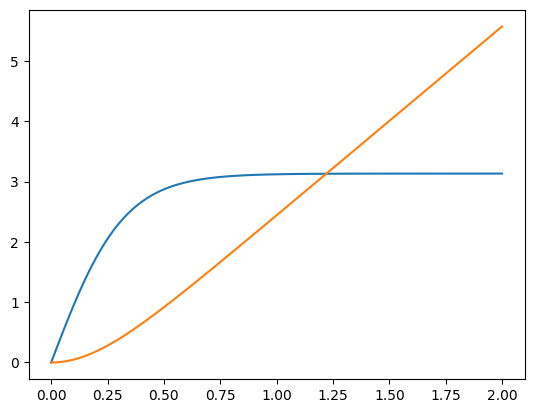

In [27]:
v = vx[:, 0]
x = vx[:, 1]

plt.plot(ts1, v)
plt.plot(ts1, x)

-----
## Chemical Reaction
$$ Reaction 1: A + B \rightarrow C $$
$$ Reaction 2: B + C \rightarrow D $$
Initial conentrations: $A_0 = 1, B_0 = 1, C_0 = 0, D_0 = 0.$, Also, $k_1 = 1, k_2 = 1.5.$<br>
Rate equation:
$$ \frac{dA}{dt} = -k_1AB, $$
$$ \frac{dB}{dt} = -k_1AB -k_2BC, $$
$$ \frac{dC}{dt} = k_1AB -k_2BC, $$
$$ \frac{dD}{dt} = k_2BC. $$
Solve for concentration of $A, B, C,$ and $D$ as function of time to $t = 3s.$


In [33]:
def rhsf(ABCD, t, k1, k2):
    A = ABCD[0]
    B = ABCD[1]
    C = ABCD[2]
    D = ABCD[3]
    
    dAdt = -k1 * A * B
    dBdt = -k1 * A * B - k2 * B * C
    dCdt = k1 * A * B - k2 * B * C
    dDdt = k2 * B * C
    
    return np.array([dAdt, dBdt, dCdt, dDdt])

ABCD0 = np.array([1, 1, 0, 0])
ts = np.linspace(0, 10, 1500)
k1, k2 = (1.0, 1.5)

ABCD = odeint(rhsf, ABCD0, ts, (k1, k2))

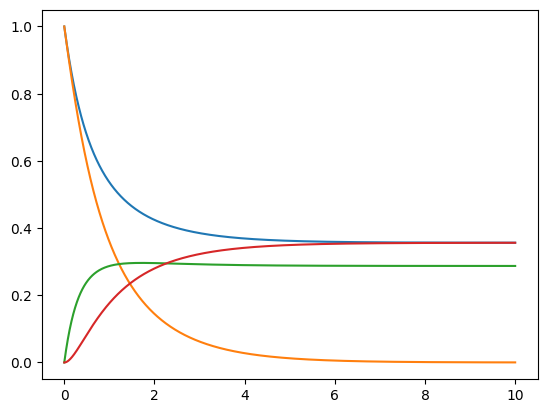

In [34]:
plt.plot(ts, ABCD[:, 0])
plt.plot(ts, ABCD[:, 1])
plt.plot(ts, ABCD[:, 2])
plt.plot(ts, ABCD[:, 3])


**Equilibrium has reached!**